# Add new features to the data
Based on the results from exploring the numerical features distribution

In [31]:
# import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set overall style parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# load the dataset
data = pd.read_csv('../data/heart.csv')

# check
data.shape

(918, 12)

After some visualising and testing, I think I will only add two features: 
- **Cholesterol groups** (levels: >80 ?)
- **Oldpeak groups** (levels: >0.7 ?)

<br>

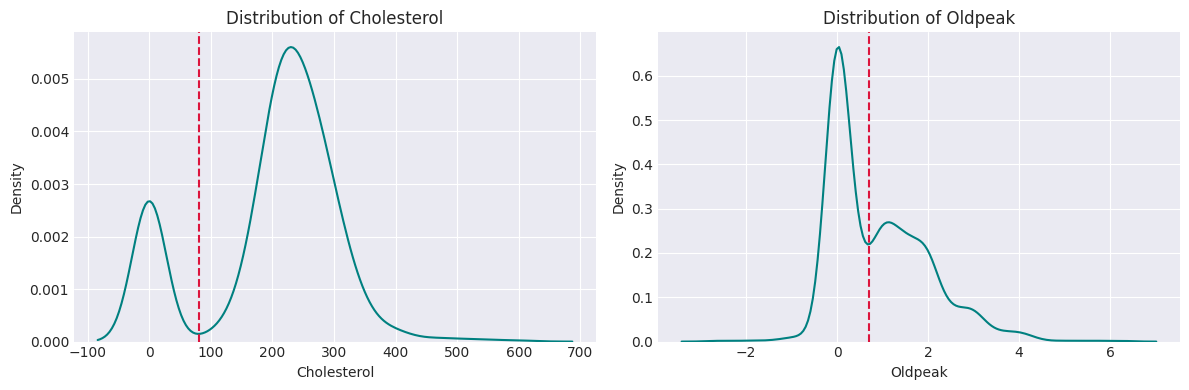

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot Cholesterol distribution
sns.kdeplot(data=data, x='Cholesterol', ax=ax1, color='teal')
ax1.axvline(x=80, color='crimson', linestyle='--')
ax1.set_title('Distribution of Cholesterol')
ax1.set_xlabel('Cholesterol')

# Plot Oldpeak distribution
sns.kdeplot(data=data, x='Oldpeak', ax=ax2, color='teal')
ax2.axvline(x=0.7, color='crimson', linestyle='--')
ax2.set_title('Distribution of Oldpeak')
ax2.set_xlabel('Oldpeak')

plt.tight_layout()
plt.show()

In [33]:
# Binary classification of Cholesterol levels
data['LawChol'] = data['Cholesterol'] > 100
data['LawChol'] = data['LawChol'].astype(int)
data.groupby('HeartDisease')['LawChol'].value_counts()

HeartDisease  LawChol
0             1          388
              0           22
1             1          355
              0          153
Name: count, dtype: int64

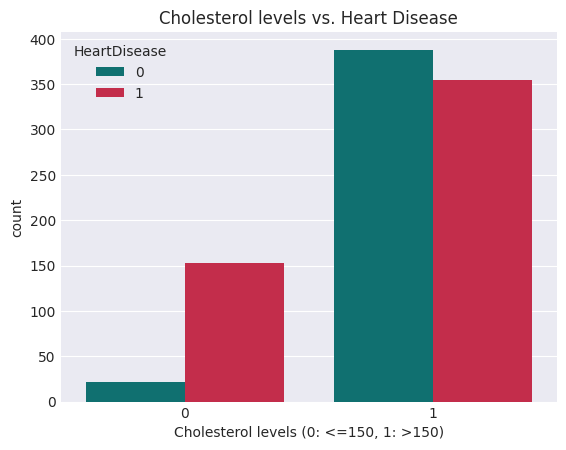

In [34]:
sns.countplot(x='LawChol', data=data, hue='HeartDisease', palette=['teal', 'crimson'])
plt.title('Cholesterol levels vs. Heart Disease')
plt.xlabel('Cholesterol levels (0: <=150, 1: >150)')
plt.show()

In [35]:
# Binary classification of Oldpeak levels
data['LawOldpeak'] = data['Oldpeak'] < 0.7
data['LawOldpeak'] = data['LawOldpeak'].astype(int)
data['LawOldpeak'].value_counts()

LawOldpeak
1    472
0    446
Name: count, dtype: int64

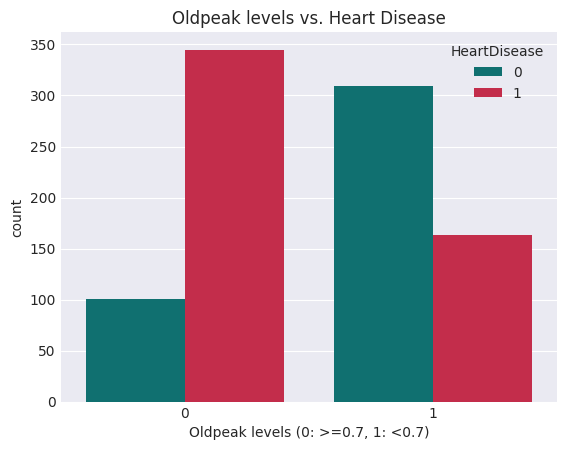

In [36]:
# Plotting Oldpeak levels against Heart Disease
sns.countplot(x='LawOldpeak', data=data, hue='HeartDisease', palette=['teal', 'crimson'])
plt.title('Oldpeak levels vs. Heart Disease')
plt.xlabel('Oldpeak levels (0: >=0.7, 1: <0.7)')
plt.show()

In [37]:
# Save the modified DataFrame with new features
if not os.path.exists('../data/heart_featured.csv'):
    data.to_csv('../data/heart_featured.csv', index=False)